In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Definindo o caminho e carregando
PROJECT_DIR = Path(".").resolve().parents[0] # Subindo 1 nivel chegando na raiz da pasta (project)
DATA_PROCESSED_OLIST = PROJECT_DIR / "data" / "processed" / "olist"


In [2]:
order_items_path = DATA_PROCESSED_OLIST / "order_items.parquet"
order_items = pd.read_parquet(order_items_path)

In [3]:
print(order_items.shape)
print(order_items.info())
order_items.head()

(112650, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Visão geral `order_items`

- Tabela `order_items` com 112.650 linhas e 7 colunas.
- Não há valores nulos em nenhuma coluna.

**Numéricas foco:**
- `price`
- `freight_value`

**Categóricas foco:**
- `seller_id` (vendedor)
- `product_id` (produto)

**Temporal (guardar para depois):**
- `shipping_limit_date` (vamos usar depois para séries temporais / sazonalidade)


In [4]:
print(order_items.isna().mean().sort_values(ascending=False))
order_items.isna()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
112645,False,False,False,False,False,False,False
112646,False,False,False,False,False,False,False
112647,False,False,False,False,False,False,False
112648,False,False,False,False,False,False,False


### Nulos em `order_items`

- Usei `order_items.isna().mean().sort_values(ascending=False)` para calcular a proporção de nulos por coluna.
- Todas as colunas retornaram `0.0`.
- Conclusão: **não há valores faltantes na tabela `order_items`**.
- Isso facilita a etapa de EDA, pois não preciso decidir ainda sobre estratégias de imputação ou remoção de linhas por falta de dados.


In [5]:
seller_counts = order_items["seller_id"].value_counts()
seller_counts.head(10)


seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64

### Distribuição de `seller_id`

- Usei `seller_id.value_counts()` e observei:
  - Top 1 seller: ~2.033 itens.
  - Top 10 sellers: todos com mais de ~1.100 itens cada.
- Isso indica que poucos sellers concentram uma parcela grande do volume de itens vendidos.
- Há muitos outros sellers com poucas vendas (não mostrei aqui, mas aparece olhando o final da série).


In [6]:
product_counts = order_items["product_id"].value_counts()
product_counts.head(10)


product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64

> Top 10 `product_id` aparecem entre ~270 e ~530 vezes; muitos outros produtos têm bem menos ocorrências (cauda longa).

In [7]:
seller_price_stats = order_items.groupby("seller_id")["price"].agg(["count", "mean", "sum"])
seller_price_stats.sort_values("sum", ascending=False).head(5)


,count,mean,sum
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,1156,198.505735,229472.63
53243585a1d6dc2643021fd1853d8905,410,543.356220,222776.05
4a3ca9315b744ce9f8e9374361493884,1987,100.892260,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,586,331.129744,194042.03
7c67e1448b00f6e969d365cea6b010ab,1364,137.774113,187923.89


### Sellers – agregações de `price`

- Agrupei `order_items` por `seller_id` e agreguei `price` com `count`, `mean` e `sum`.
- Os top sellers por `sum(price)` têm valores totais entre ~R$ 188k e ~R$ 229k.
- Há dois perfis claros:
  - sellers com **muito volume** (1.000–2.000 itens) e preço médio mais baixo (≈ R$ 100–200);
  - sellers com **menos volume** (≈ 400–600 itens) mas preço médio bem mais alto (≈ R$ 300–540).
- Isso indica forte concentração de receita em poucos vendedores e perfis distintos (volume vs. alto ticket).


In [8]:
product_price_stats = order_items.groupby("product_id")["price"].agg(["count", "mean", "sum"])
product_price_stats.sort_values("sum", ascending=False).head(5)


,count,mean,sum
product_id,,,
bb50f2e236e5eea0100680137654686c,195,327.615385,63885.00
6cdd53843498f92890544667809f1595,156,350.834615,54730.20
d6160fb7873f184099d9bc95e30376af,35,1397.124000,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,343,137.651633,47214.51
99a4788cb24856965c36a24e339b6058,488,88.167131,43025.56


### Produtos – agregações de `price`

- Agrupei `order_items` por `product_id` e agreguei `price` com `count`, `mean` e `sum`.
- Os top 5 produtos por `sum(price)` geram entre ~R$ 43k e ~R$ 64k em vendas.
- Alguns produtos têm **preço médio alto** (R$ 320–350) com menos unidades vendidas (≈ 150–200),
  enquanto outros têm **preço médio baixo** (≈ R$ 90–140) mas grande volume (≈ 330–480 itens).
- A maior parte dos produtos (fora do top) tem `count` bem mais baixo, reforçando uma distribuição em cauda longa: poucos produtos “campeões” e muitos produtos de nicho.


In [9]:
order_items[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


### Estatísticas descritivas – `price` e `freight_value`

Usei `order_items[["price", "freight_value"]].describe()` para analisar as variáveis numéricas principais.

**`price`**
- A maior parte dos preços está entre aproximadamente **R$ 40 (Q1)** e **R$ 135 (Q3)**.
- A média (~R$ 120,65) é bem maior do que a mediana (~R$ 74,90), indicando uma distribuição assimétrica com **cauda à direita** (alguns itens bem mais caros puxam a média para cima).
- O valor máximo de `price` é **R$ 6.735**, muito acima do Q3 (~R$ 135) e da mediana, o que sugere a presença de **outliers de preço bastante altos**.
- O desvio padrão (~R$ 183,6) é maior do que a própria média, reforçando a forte dispersão dos preços.

**`freight_value`**
- O frete típico fica entre **~R$ 13 (Q1)** e **~R$ 21 (Q3)**, com mediana em torno de **R$ 16,26**.
- A média (~R$ 19,99) é um pouco maior que a mediana, indicando assimetria para cima, mas menos extrema do que em `price`.
- Há valores de frete muito altos: o máximo é **R$ 409,68**, bem acima do Q3 (~R$ 21), o que também indica **outliers de frete**.
- Mesmo assim, o desvio padrão (~R$ 15,8) é menor do que a média, sugerindo uma dispersão relevante, porém mais moderada que a de `price`.


(<Axes: >, None)

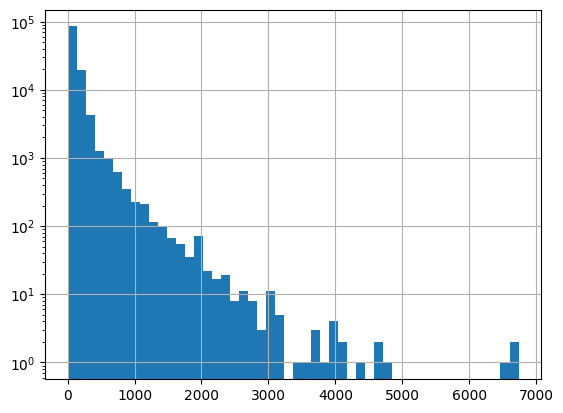

In [10]:
order_items["price"].hist(bins=50), plt.yscale("log")

### Histograma de `price`

- Usei `order_items["price"].hist(bins=50)` com `plt.yscale("log")`.
- A maior parte dos itens está concentrada em preços mais baixos, e a frequência cai rapidamente conforme o preço aumenta.
- Existe uma cauda longa de preços altos, com alguns itens chegando perto de R$ 6.700, o que indica presença de valores extremos (outliers).


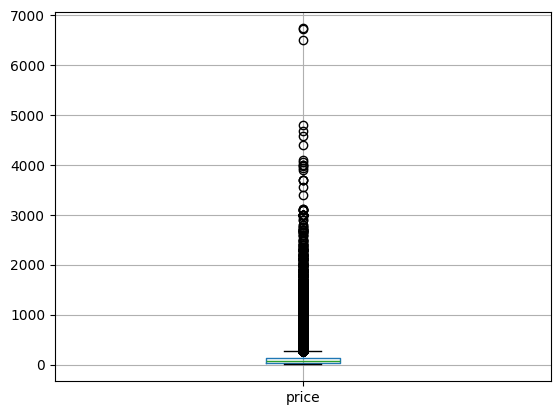

In [11]:
order_items.boxplot(column="price")
plt.show()

### Boxplot de `price`

- O boxplot de `price` mostra a caixa concentrada aproximadamente entre **R$ 40 (Q1)** e **R$ 135 (Q3)**, com mediana em torno de **R$ 75**.
- A maior parte dos dados está comprimida nessa faixa baixa, enquanto os “bigodes” e os inúmeros pontos acima indicam muitos **outliers de preço elevado**, chegando a quase **R$ 6.700**.
- Isso reforça o que vimos no histograma e no `describe()`: a distribuição de `price` é bastante assimétrica, com uma cauda longa de itens muito mais caros do que a faixa típica.


In [12]:
Q1 = order_items["price"].quantile(0.25)
Q3 = order_items["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3, IQR)
print(lower_bound, upper_bound)


39.9 134.9 95.0
-102.6 277.4


In [14]:
mask_outliers = (order_items["price"] < lower_bound) | (order_items["price"] > upper_bound)
N_outliers = mask_outliers.sum()
total = len(order_items)
P_outliers = N_outliers / total * 100
print(N_outliers, P_outliers)

8427 7.480692410119841


## Bloco 5 — Distribuição e outliers de `price`

### Histograma

- Usei `order_items["price"].hist(bins=50)` com `plt.yscale("log")`.
- O histograma mostra a maior parte dos itens concentrada em preços mais baixos, e a frequência cai rapidamente conforme o preço aumenta.
- Existe uma cauda longa de preços altos, com valores chegando perto de **R$ 6.700**, o que indica a presença de valores extremos.

### Boxplot

- O boxplot de `price` mostra a caixa concentrada aproximadamente entre **R$ 40 (Q1)** e **R$ 135 (Q3)**, com mediana em torno de **R$ 75**.
- A maior parte dos dados está comprimida nessa faixa, enquanto há muitos pontos acima do limite superior, indicando diversos **outliers de preço elevado**.

### Outliers pelo critério IQR

- Q1 ≈ **39,9**, Q3 ≈ **134,9**, então **IQR ≈ 95**.
- Limites pelo critério de boxplot:
  - Limite inferior: `Q1 − 1,5 × IQR ≈ -102,6`  
  - Limite superior: `Q3 + 1,5 × IQR ≈ 277,4`
- Como o limite inferior é negativo, não há outliers “para baixo”; todos os outliers são preços **acima de ~R$ 277**.
- Foram encontradas **8427 observações** fora desse intervalo, o que corresponde a aproximadamente **7,5%** das 112.650 linhas.
- Esses outliers são majoritariamente preços muito elevados e explicam a cauda longa observada no histograma e no boxplot.


## Bloco 6 — Resumo da EDA e hipóteses iniciais

### 6.1 Resumo da EDA em `order_items`

- A tabela `order_items` possui **112.650 linhas e 7 colunas**, sem valores nulos. As principais variáveis numéricas analisadas foram `price` e `freight_value`, e as categóricas de interesse foram `seller_id` e `product_id`.
- A distribuição de `seller_id` e `product_id` é bastante concentrada: poucos sellers e poucos produtos respondem por uma parcela relevante do volume e do valor de vendas, enquanto muitos sellers/produtos têm poucas ocorrências. Isso sugere uma estrutura de **cauda longa** típica de e-commerce (poucos “campeões” e muitos itens de nicho).
- Em `price`, a maior parte dos valores está entre aproximadamente **R$ 40 (Q1)** e **R$ 135 (Q3)**, com **mediana em torno de R$ 75** e **média ~R$ 120,65**, o que indica uma distribuição assimétrica com **cauda à direita** (preços altos puxando a média para cima). O valor máximo chega a aproximadamente **R$ 6.735**, bem acima do intervalo típico.
- Em `freight_value`, o frete “normal” fica em torno de **R$ 13 (Q1)** a **R$ 21 (Q3)**, com **mediana ~R$ 16,26** e **média ~R$ 19,99**. Também há fretes muito altos (máximo ~R$ 409,68), mas a dispersão é menos extrema do que em `price`.
- A análise de outliers via IQR para `price` mostrou **Q1 ≈ 39,9**, **Q3 ≈ 134,9** e **IQR ≈ 95**, resultando em um limite superior em torno de **R$ 277**. Aproximadamente **8.427 observações (~7,5% do total)** estão acima desse limite, caracterizando-as como outliers de preço elevado. Esses casos explicam a cauda longa observada no histograma e no boxplot.

### 6.2 Hipóteses iniciais para o projeto P1

Com base nessa EDA inicial em `order_items`, algumas hipóteses que podem ser exploradas nas próximas etapas do projeto:

- **H1 — Concentração de receita em poucos sellers:**  
  Um subconjunto pequeno de sellers concentra uma fração grande do valor total de vendas (`sum(price)`). Estratégias focadas nesses sellers provavelmente têm alto impacto na demanda agregada.

- **H2 — Concentração de receita em poucos produtos (“campeões”):**  
  Poucos `product_id` respondem por uma parte relevante do faturamento, enquanto a maioria dos produtos tem volume baixo. Isso sugere uma **cauda longa de produtos de nicho** e pode exigir abordagens diferentes para previsão de demanda entre “campeões” e cauda longa.

- **H3 — Perfis distintos de sellers/produtos (volume vs. ticket alto):**  
  Existem pelo menos dois perfis:  
  (a) sellers/produtos com **alto volume e preço médio mais baixo**;  
  (b) sellers/produtos com **baixo volume e preço médio elevado**.  
  Esses perfis podem responder de forma diferente a variações de preço, frete e sazonalidade.

- **H4 — Impacto de outliers de preço na modelagem:**  
  Como cerca de **7,5% dos itens têm preços muito acima do limite IQR**, esses outliers podem distorcer modelos de previsão (por exemplo, afetando a escala da variável alvo). Pode ser necessário testar transformações (log, winsorização, caps) ou tratamentos específicos para esses casos extremos.

- **H5 — Relação entre frete e comportamento de compra:**  
  A presença de fretes muito altos (até ~R$ 400) sugere que o **custo de frete** pode ser um fator relevante para demanda. Produtos/sellers com frete acima de certo patamar podem ter padrão de vendas diferente dos que operam com fretes próximos da faixa típica (R$ 13–21).

- **H6 — Importância da dimensão temporal (`shipping_limit_date`):**  
  Como existe uma data limite de envio para cada item, a análise futura dessa coluna pode revelar **padrões sazonais** (por mês, trimestre, datas especiais etc.), que provavelmente serão importantes para qualquer modelo de previsão de demanda.

- **H7 — Necessidade de segmentar antes de modelar:**  
  Diante da forte heterogeneidade (sellers, produtos, cauda longa, outliers), é provável que modelos funcionem melhor se a base for segmentada (por exemplo, por tipo de produto, faixa de preço ou faixa de volume), em vez de tratar todo o universo de `order_items` como algo homogêneo.
